In [1]:
from selenium import webdriver
import chromedriver_autoinstaller

In [2]:
chromedriver_autoinstaller.install()
driver = webdriver.Chrome()

In [3]:
검색어 = "납작만두"

In [11]:
driver.get("https://google.com")

In [12]:
from selenium.webdriver.common.by import By

검색어입력창 = driver.find_element(By.CSS_SELECTOR, "textarea[title='검색']")

In [13]:
검색어입력창.send_keys(검색어)

In [14]:
검색어입력창.submit()

In [15]:
이미지버튼 = driver.find_element(By.CSS_SELECTOR, "#cnt > div:nth-child(8) > div > div > div > div > div > a:nth-child(2)")

In [16]:
이미지버튼.click()

In [21]:
from selenium.common import ElementNotInteractableException
from time import sleep

# 스크롤을 끝까지 내리자.
while True:
    현재_스크롤_길이 = driver.execute_script("return document.body.scrollHeight")
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

    try:
        결과더보기 = driver.find_element(By.CSS_SELECTOR, "input[value='결과 더보기']")
        결과더보기.click()
    except ElementNotInteractableException as e:
        pass

    sleep(3)

    if 현재_스크롤_길이 == driver.execute_script("return document.body.scrollHeight"):
        break

In [22]:
# 현재 노출된 모든 이미지들의 링크를 리스트로 취합한다.
# 단, width 속성이 없는 이미지는 아이콘이므로 배제한다.

이미지링크_리스트 = []
for i in driver.find_elements(By.CSS_SELECTOR, "img[width]"):
    이미지링크_리스트.append(i.get_attribute("src"))

['',
 '',
 '',
 '',
 '']
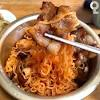
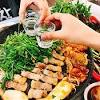
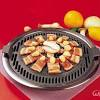
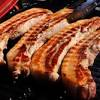
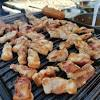

In [23]:
이미지링크_리스트[:5]

In [24]:
import urllib

In [28]:
%pip install tqdm
from tqdm import tqdm

for idx, url in tqdm(enumerate(이미지링크_리스트)):
    try:
        with urllib.request.urlopen(url) as response:
            image = response.read()
            with open(f"imgs/{idx}.jpg", "wb") as f:
                f.write(image)
    except AttributeError as e:
        pass

856it [01:23, 10.20it/s] 
